# Importing Necessary Modules

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
print("All done")

All done


# Importing Modules for ML model

In [117]:
from scipy.stats import chi2_contingency
from sklearn.metrics import mean_absolute_error, mean_squared_error

#data transformation
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Decision Tree Regressor Model
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
print("Imported all Modules")

Imported all Modules


# Loading the Dataset for fuel consumption prediction

In [7]:
fuel_data = pd.read_csv("C:/Users/Lenovo/Downloads/fuel-consumption-prediciton.csv")
fuel_data

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2021,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,199,6,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,26,256,4,3
2,2021,Acura,RDX SH-AWD,Sport utility vehicle: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2021,Acura,RDX SH-AWD A-SPEC,Sport utility vehicle: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,2021,Volvo,XC40 T5 AWD,Sport utility vehicle: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,5,5
966,2021,Volvo,XC60 T5 AWD,Sport utility vehicle: Small,2.0,4,AS8,Z,11.1,8.3,9.9,29,230,5,5
967,2021,Volvo,XC60 T6 AWD,Sport utility vehicle: Small,2.0,4,AS8,Z,11.7,8.6,10.3,27,240,5,7
968,2021,Volvo,XC90 T5 AWD,Sport utility vehicle: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,5,5


In [3]:
fuel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            970 non-null    int64  
 1   Make                  970 non-null    object 
 2   Model                 970 non-null    object 
 3   Vehicle class         970 non-null    object 
 4   Engine size (L)       970 non-null    float64
 5   Cylinders             970 non-null    int64  
 6   Transmission          970 non-null    object 
 7   Fuel type             970 non-null    object 
 8   City (L/100 km)       970 non-null    float64
 9   Highway (L/100 km)    970 non-null    float64
 10  Combined (L/100 km)   970 non-null    float64
 11  Combined (mpg)        970 non-null    int64  
 12  CO2 emissions (g/km)  970 non-null    int64  
 13  CO2 rating            970 non-null    int64  
 14  Smog rating           970 non-null    int64  
dtypes: float64(4), int64(6)

In [8]:
# Displays column Names
fuel_data.columns

Index(['Model year', 'Make', 'Model', 'Vehicle class', 'Engine size (L)',
       'Cylinders', 'Transmission', 'Fuel type', 'City (L/100 km)',
       'Highway (L/100 km)', 'Combined (L/100 km)', 'Combined (mpg)',
       'CO2 emissions (g/km)', 'CO2 rating', 'Smog rating'],
      dtype='object')

In [9]:
fuel_data[['CO2 emissions (g/km)', 'CO2 rating', 'Smog rating']].corr()

,CO2 emissions (g/km),CO2 rating,Smog rating
CO2 emissions (g/km),1.000000,-0.952616,-0.580698
CO2 rating,-0.952616,1.000000,0.548466
Smog rating,-0.580698,0.548466,1.000000


# Data Cleaning

In [10]:
# Removing unnecessary data and create new dataframe by using drop() Method
df=fuel_data.drop(['Model year', 'Make', 'Model', 
       'Combined (mpg)',  'City (L/100 km)',
       'Highway (L/100 km)',  'Combined (mpg)',
       'CO2 emissions (g/km)','Smog rating'], axis=1)
df

,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,Combined (L/100 km),CO2 rating
0,Compact,2.4,4,AM8,Z,8.6,6
1,Two-seater,3.5,6,AM9,Z,11.0,4
2,Sport utility vehicle: Small,2.0,4,AS10,Z,9.9,5
3,Sport utility vehicle: Small,2.0,4,AS10,Z,10.3,5
4,Compact,2.0,4,AS10,Z,9.8,5
...,...,...,...,...,...,...,...
965,Sport utility vehicle: Small,2.0,4,AS8,Z,9.4,5
966,Sport utility vehicle: Small,2.0,4,AS8,Z,9.9,5
967,Sport utility vehicle: Small,2.0,4,AS8,Z,10.3,5
968,Sport utility vehicle: Standard,2.0,4,AS8,Z,10.1,5


In [11]:
# Renaming Columns Name
df = df.rename(columns = {'Engine size (L)':'Engine Size',  'Combined (L/100 km)':'Fuel Consumption'})
df

,Vehicle class,Engine Size,Cylinders,Transmission,Fuel type,Fuel Consumption,CO2 rating
0,Compact,2.4,4,AM8,Z,8.6,6
1,Two-seater,3.5,6,AM9,Z,11.0,4
2,Sport utility vehicle: Small,2.0,4,AS10,Z,9.9,5
3,Sport utility vehicle: Small,2.0,4,AS10,Z,10.3,5
4,Compact,2.0,4,AS10,Z,9.8,5
...,...,...,...,...,...,...,...
965,Sport utility vehicle: Small,2.0,4,AS8,Z,9.4,5
966,Sport utility vehicle: Small,2.0,4,AS8,Z,9.9,5
967,Sport utility vehicle: Small,2.0,4,AS8,Z,10.3,5
968,Sport utility vehicle: Standard,2.0,4,AS8,Z,10.1,5


In [12]:
#Checking null values
df.isna().sum()

Vehicle class       0
Engine Size         0
Cylinders           0
Transmission        0
Fuel type           0
Fuel Consumption    0
CO2 rating          0
dtype: int64

In [13]:
df_number = df.select_dtypes(include=['number'])  # Select only numeric columns
correlation_matrix = df_number.corr()            # Calculate correlation
print(correlation_matrix)


                  Engine Size  Cylinders  Fuel Consumption  CO2 rating
Engine Size          1.000000   0.920225          0.816165   -0.779838
Cylinders            0.920225   1.000000          0.823522   -0.770885
Fuel Consumption     0.816165   0.823522          1.000000   -0.925378
CO2 rating          -0.779838  -0.770885         -0.925378    1.000000


In [14]:
#Checking Corelation of each feature against target variable
df_number = df.select_dtypes(include=['number'])  
correlation_with_fuel = df_number.corr()["Fuel Consumption"].to_frame()  
print(correlation_with_fuel)


                  Fuel Consumption
Engine Size               0.816165
Cylinders                 0.823522
Fuel Consumption          1.000000
CO2 rating               -0.925378


In [15]:
# Looking for noise in all variables, including Target variable.
for i in df.columns:
    print(i)
    print(df[i].unique(),'\n')

Vehicle class
['Compact' 'Two-seater' 'Sport utility vehicle: Small' 'Mid-size'
 'Minicompact' 'Sport utility vehicle: Standard' 'Station wagon: Small'
 'Subcompact' 'Station wagon: Mid-size' 'Full-size' 'Pickup truck: Small'
 'Pickup truck: Standard' 'Minivan' 'Van: Passenger'
 'Special purpose vehicle'] 

Engine Size
[2.4 3.5 2.  3.  2.9 4.  5.2 2.5 6.  4.4 6.6 8.  3.6 1.4 1.2 1.3 2.7 6.2
 2.8 1.5 4.3 5.3 5.7 6.4 2.3 1.  3.3 5.  1.8 1.6 3.8 5.6 3.2 6.5 4.6 3.7
 6.7] 

Cylinders
[ 4  6  8 12 10  5 16  3] 

Transmission
['AM8' 'AM9' 'AS10' 'A8' 'A9' 'M7' 'AM7' 'AS8' 'M6' 'AS6' 'AV' 'AS9' 'A10'
 'A6' 'M5' 'AV7' 'AV1' 'AM6' 'AS7' 'AV8' 'AV6' 'AV10' 'AS5'] 

Fuel type
['Z' 'X' 'D' 'E'] 

Fuel Consumption
[ 8.6 11.   9.9 10.3  9.8 11.2  8.7  9.2 11.6  9.3  9.6 12.3 11.5 13.3
 13.8 15.2 14.2  8.3  8.8  8.9  9.1  9.7 10.6 13.2 10.2 11.3 12.  14.1
 15.1 11.4 13.7 13.5 15.4 10.1 10.5 10.9 14.5 13.9 10.   9.4 16.3 15.7
 16.  12.6 11.7 14.6 10.4 12.7 11.1  8.4  9.5 22.2 26.1 11.8  8.   8.5
  9. 

In [21]:
df = df.replace({'Transmission' : {'AM8':'AM','AM9':'AM', 'AS10': 'AS', 'A8':'A', 'A9':'A', 'AM7':'AM', 'AS8':'AS', 'M6':'M', 'AS6':'AS', 'AS9':'AS', 'A10':'A', 'A6':'A', 'M5':'M', 'M7':'M', 'AV7':'AV', 'AV1':'AV', 'AM6':'AM', 'AS7':'AS', 'AV8':'AV', 'AV6':'AV', 'AV10':'AV', 'AS5':'AS', 'A7':'A'}})
df

,Vehicle class,Engine Size,Cylinders,Transmission,Fuel type,Fuel Consumption,CO2 rating
0,Compact,2.4,4,AM,Z,8.6,6
1,Two-seater,3.5,6,AM,Z,11.0,4
2,Sport utility vehicle: Small,2.0,4,AS,Z,9.9,5
3,Sport utility vehicle: Small,2.0,4,AS,Z,10.3,5
4,Compact,2.0,4,AS,Z,9.8,5
...,...,...,...,...,...,...,...
965,Sport utility vehicle: Small,2.0,4,AS,Z,9.4,5
966,Sport utility vehicle: Small,2.0,4,AS,Z,9.9,5
967,Sport utility vehicle: Small,2.0,4,AS,Z,10.3,5
968,Sport utility vehicle: Standard,2.0,4,AS,Z,10.1,5


In [22]:
df['Transmission'].unique()

array(['AM', 'AS', 'A', 'M', 'AV'], dtype=object)

# EDA

In [16]:
#Statistical Summary of data
df[['Engine Size','Cylinders','Fuel Consumption','CO2 rating']].describe()

,Engine Size,Cylinders,Fuel Consumption,CO2 rating
count,970.000000,970.000000,970.000000,970.000000
mean,3.217835,5.731959,11.102784,4.329897
std,1.388847,1.987139,2.888478,1.632498
min,1.000000,3.000000,4.000000,1.000000
25%,2.000000,4.000000,9.100000,3.000000
50%,3.000000,6.000000,10.800000,4.000000
75%,4.000000,8.000000,13.100000,5.000000
max,8.000000,16.000000,26.100000,10.000000


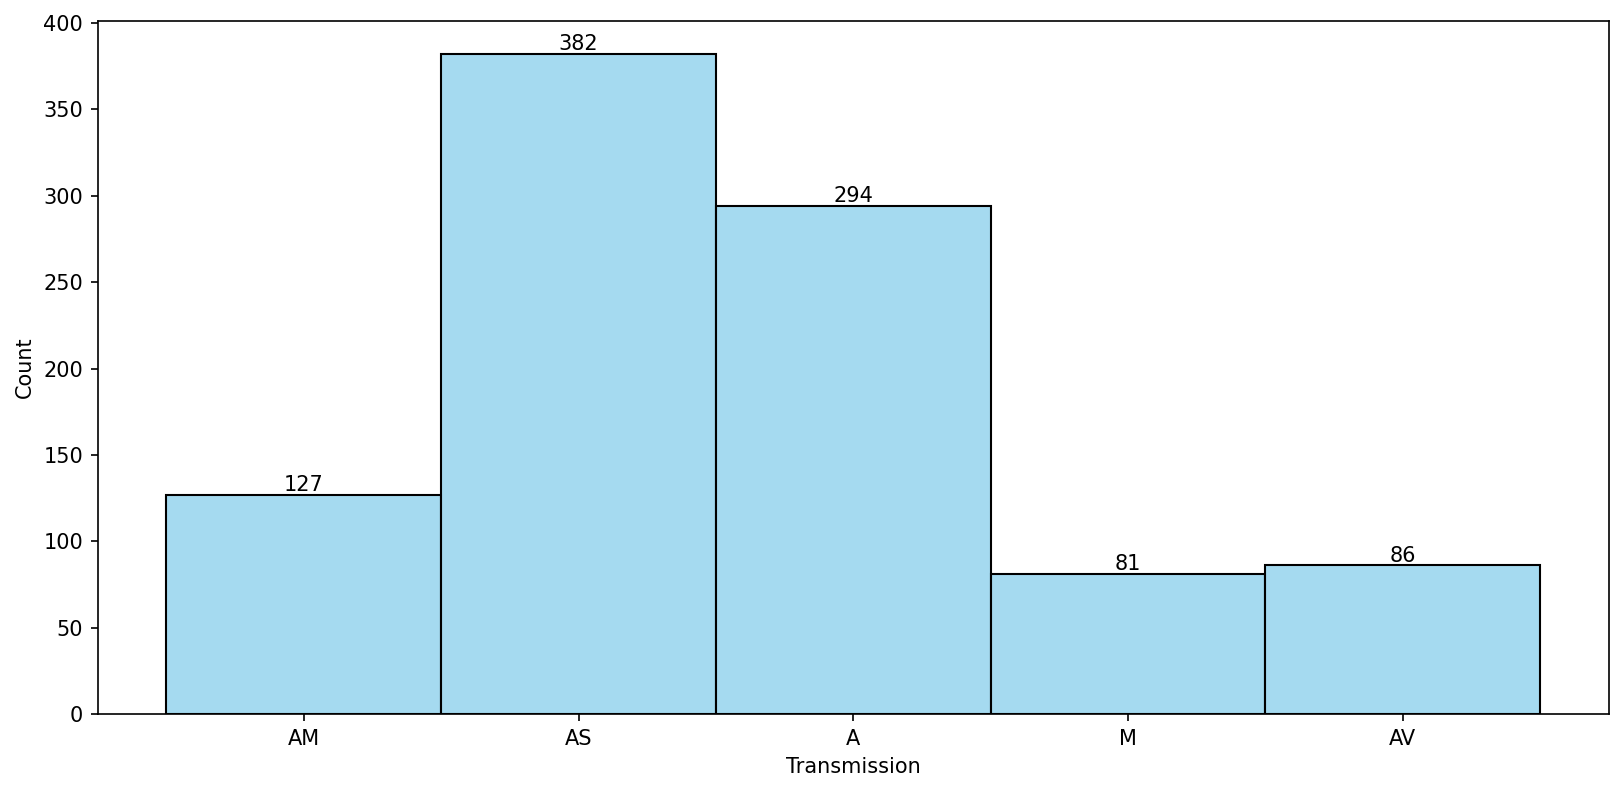

In [23]:
#  Frequency Distribution for the categorical Columns
plt.figure(figsize=(13,6), dpi=150)
chart1=sns.histplot(data=df, x='Transmission', color='skyblue')
chart1.bar_label(chart1.containers[0],size=10)
plt.show()

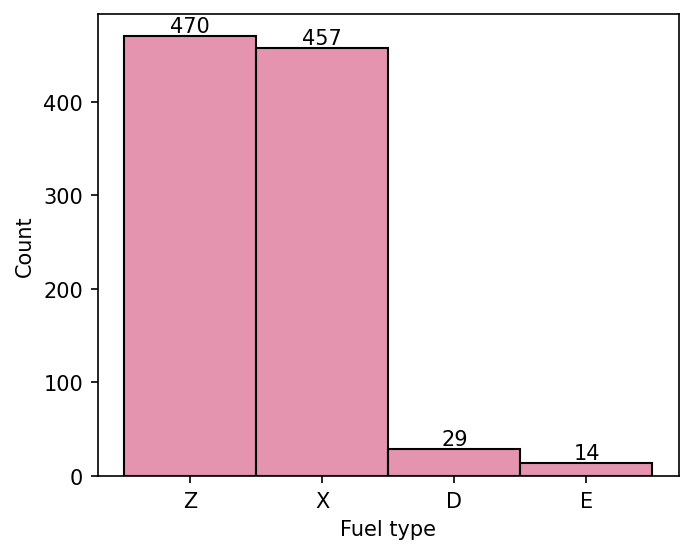

In [28]:
plt.figure(figsize=(5,4), dpi=150)
chart1 = sns.histplot(data=df, x='Fuel type', color='PaleVioletRed')
chart1.bar_label(chart1.containers[0], size=10)
plt.show()


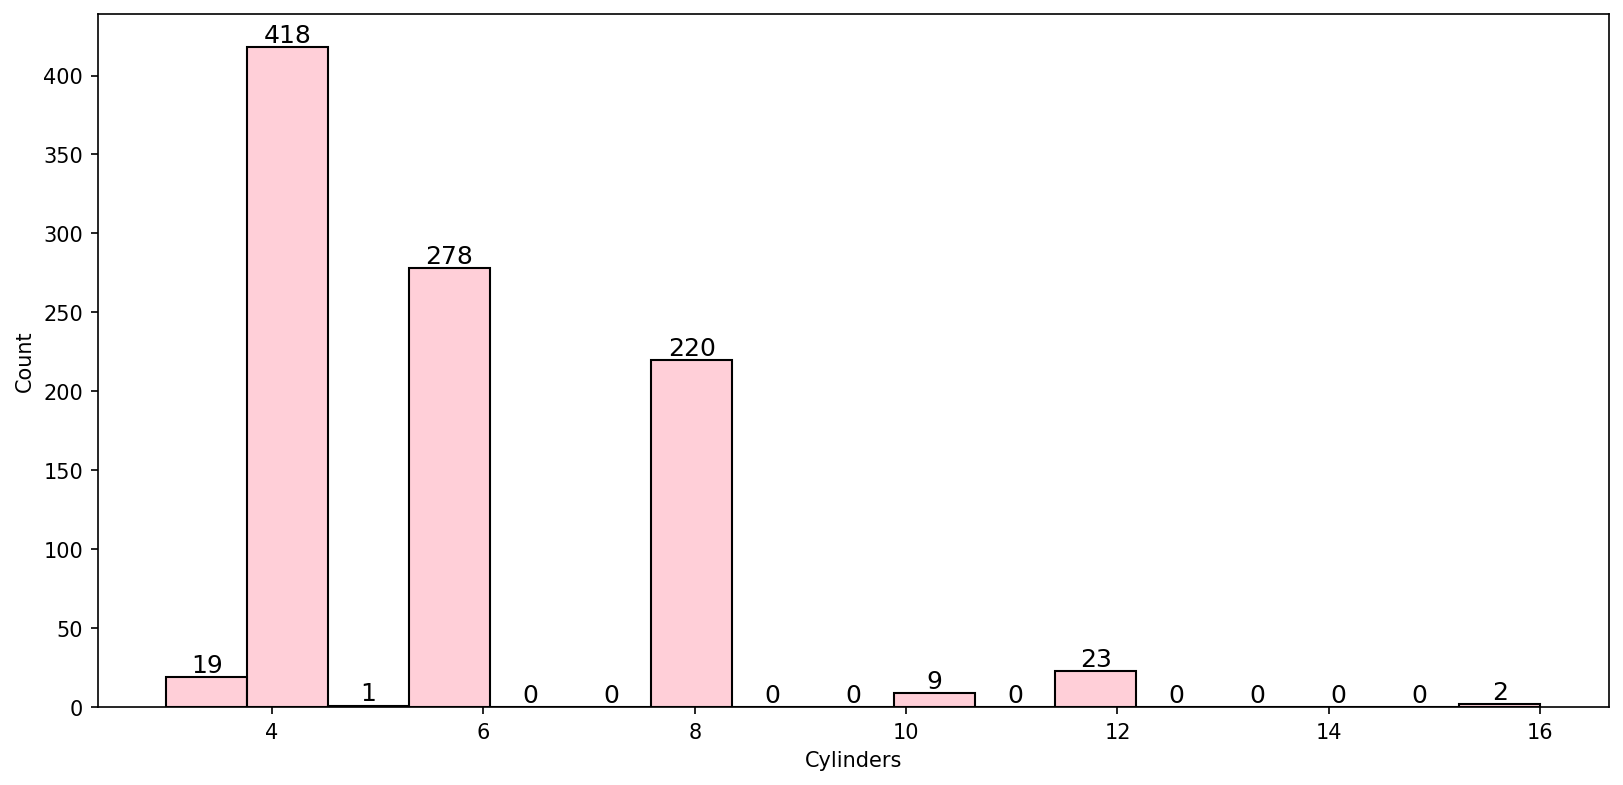

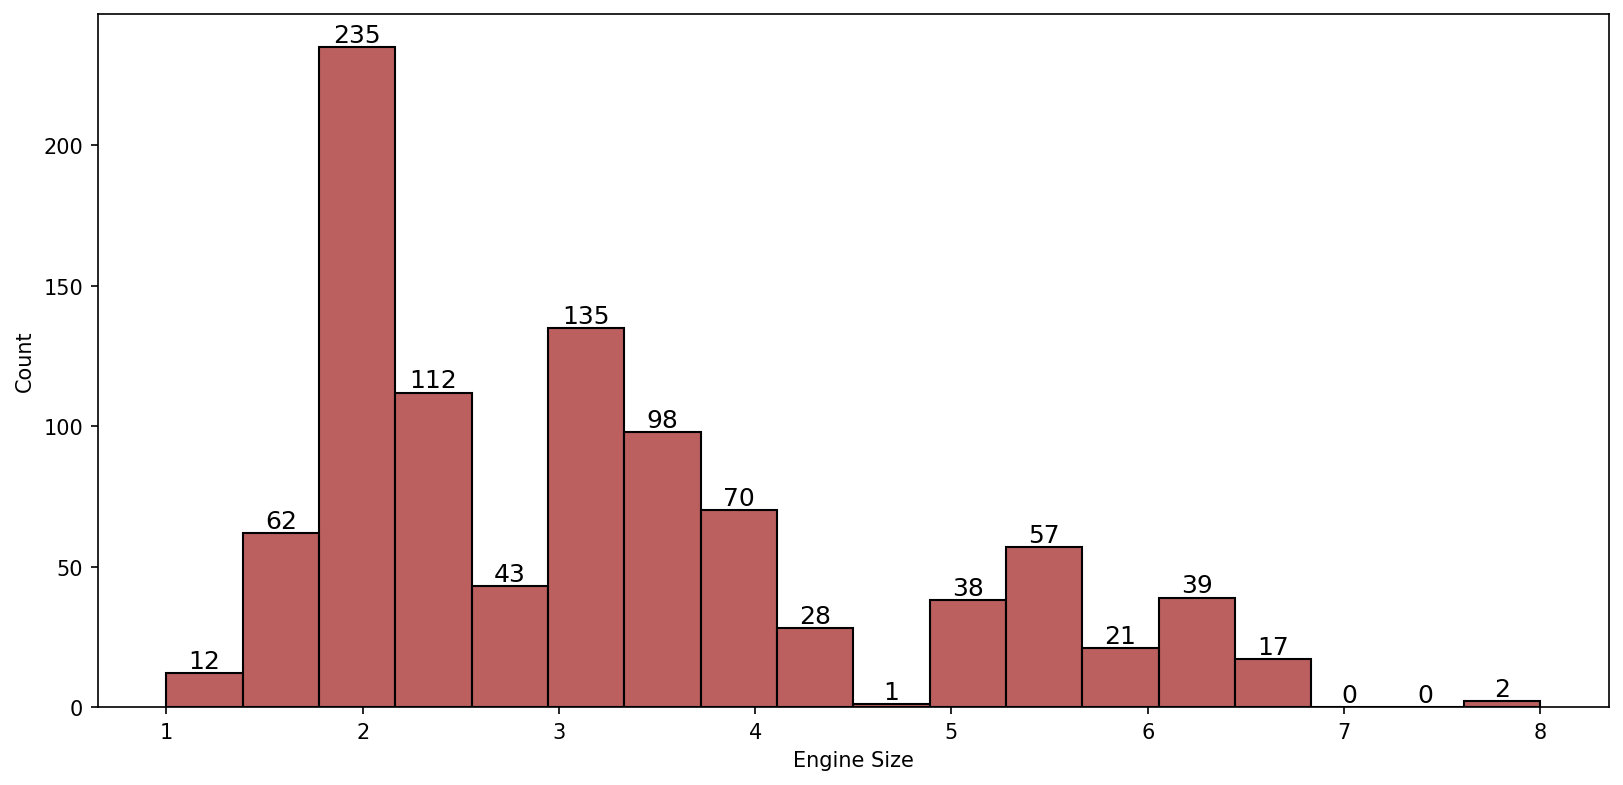

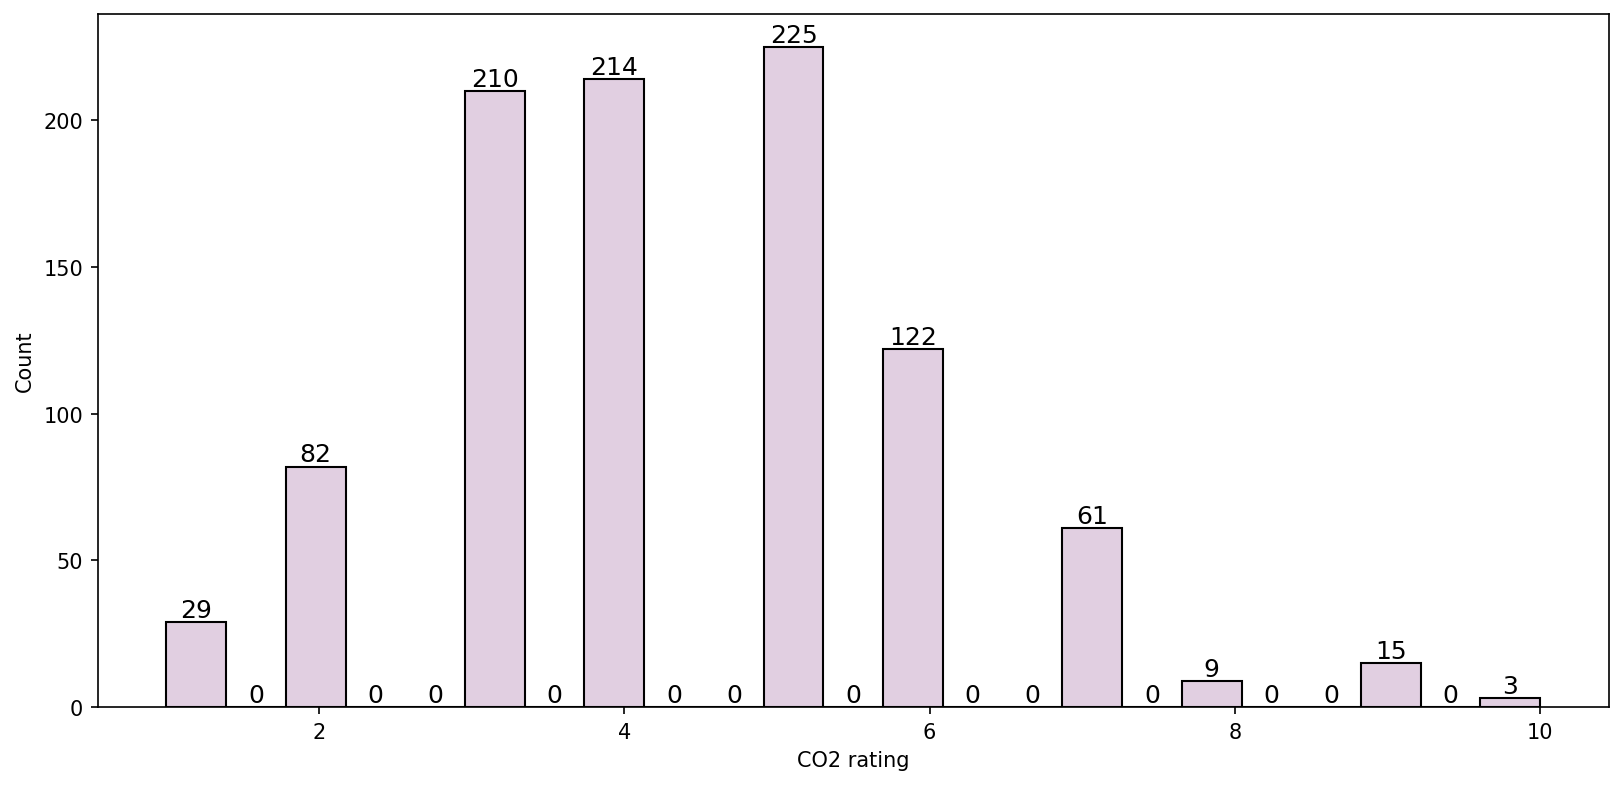

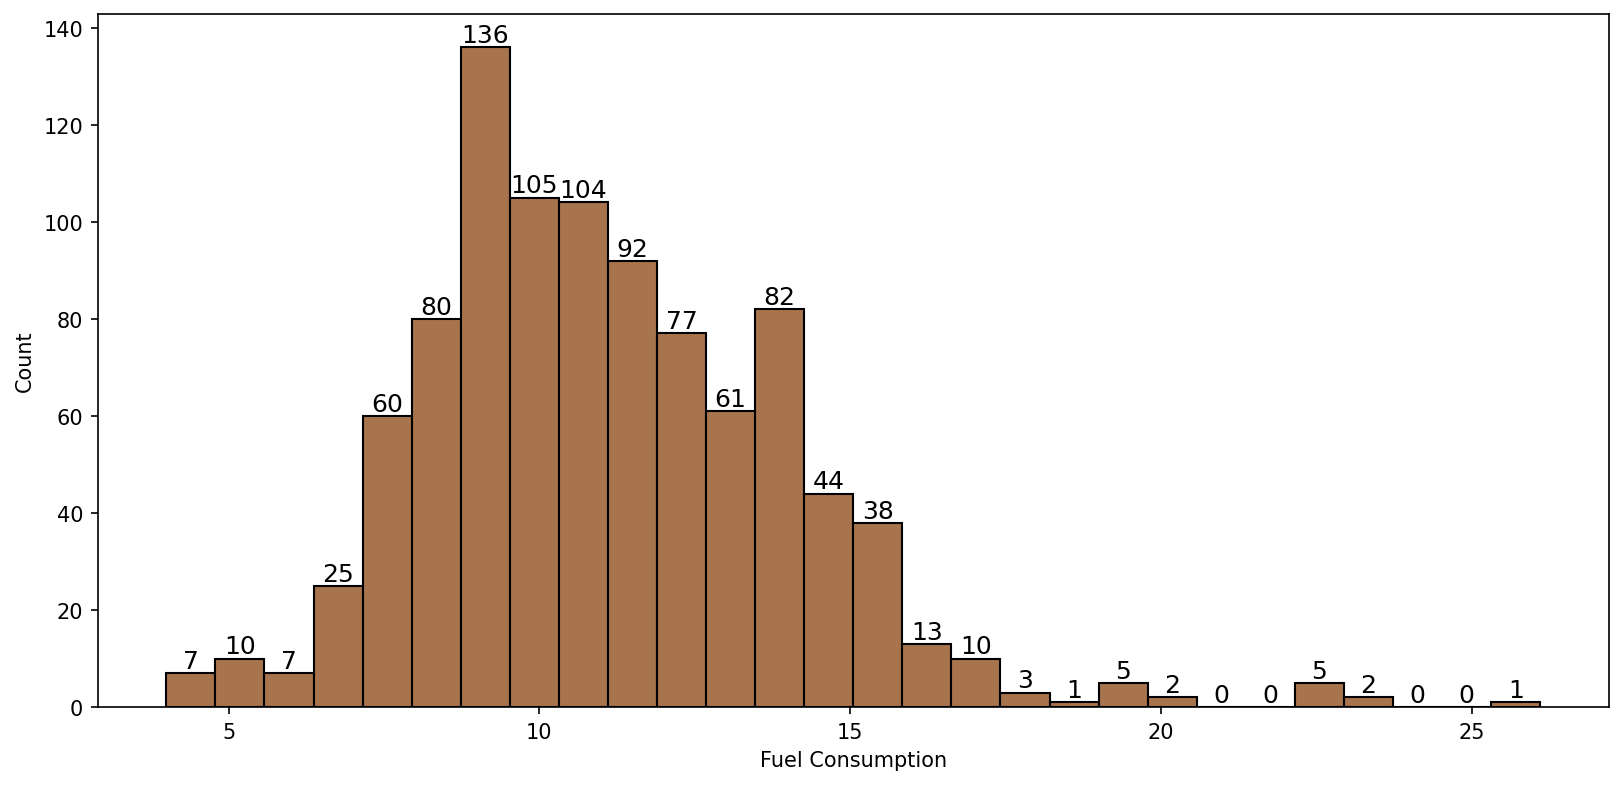

In [34]:
#Frequency Distribution on Numerical columns
column_set = ['Cylinders','Engine Size','CO2 rating','Fuel Consumption']
color_set = ['pink','brown','Thistle', 'SaddleBrown']
for colors,col in zip(color_set,column_set):
    plt.figure(figsize=(13,6), dpi=150)
    chart1=sns.histplot(data=df, x=col, color=colors)
    chart1.bar_label(chart1.containers[0],size=12)
    plt.show()

Index(['Vehicle class', 'Engine Size', 'Cylinders', 'Transmission',
       'Fuel type', 'Fuel Consumption', 'CO2 rating'],
      dtype='object')


<Figure size 1950x900 with 0 Axes>

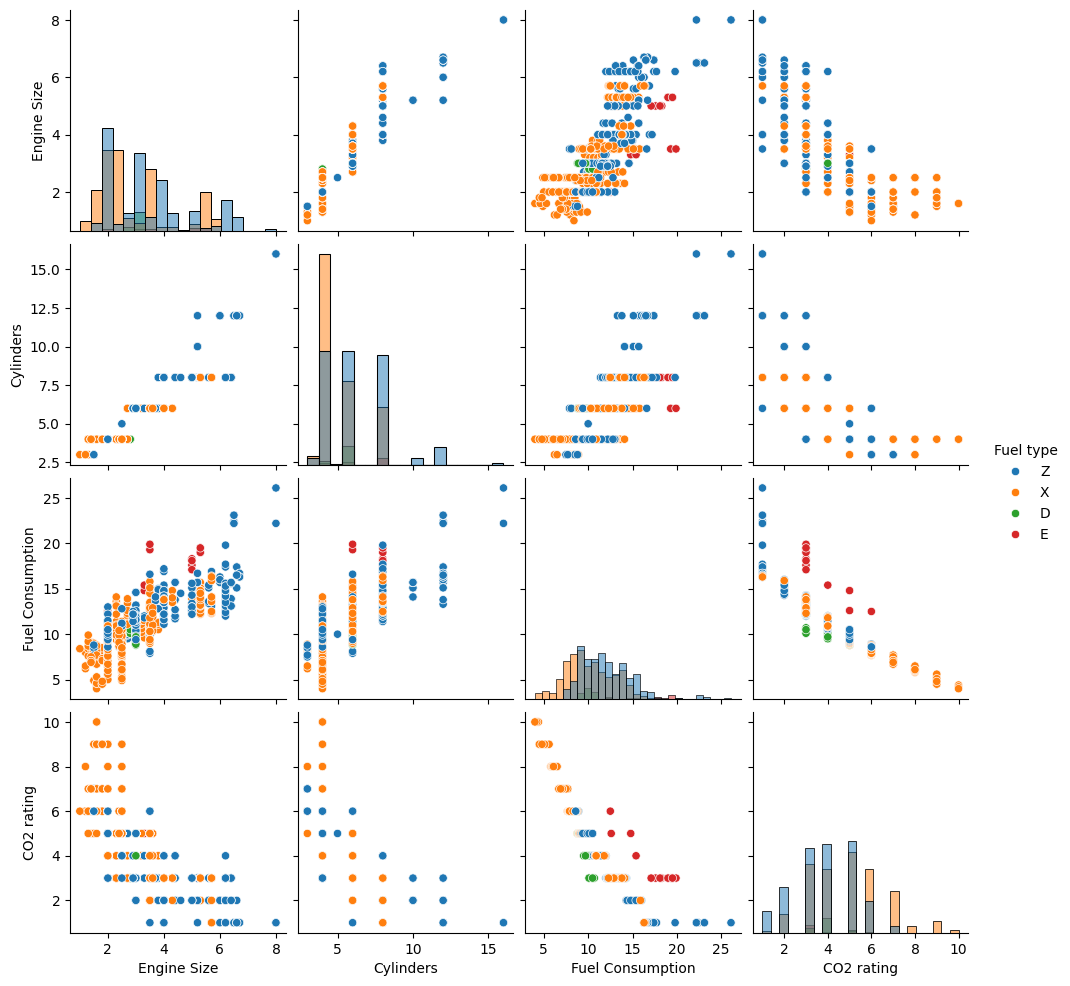

In [40]:
# Comparison Between all columns
plt.figure(figsize=(13, 6), dpi=150)
sns.pairplot(df, hue='Fuel type', diag_kind='hist')  # Replace 'Fuel Type' with the correct name
plt.show()


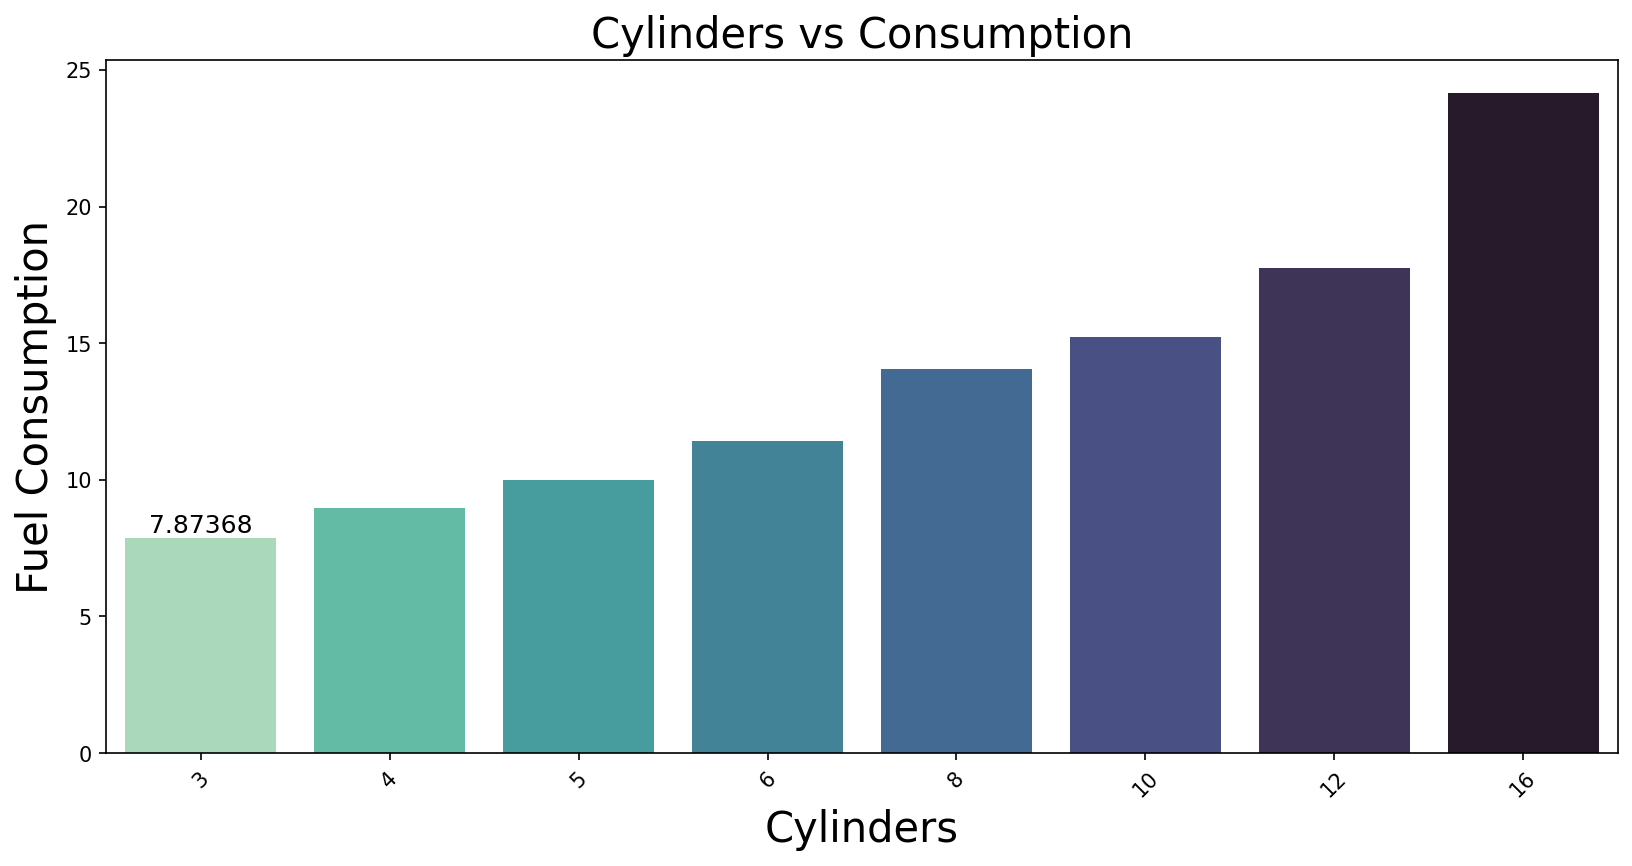

In [41]:
#Comparison between "No. of cylinders" & "Fuel consumption"
plt.figure(figsize=(13,6), dpi=150)
plt.xticks(rotation=45)
plt.title('Cylinders vs Consumption',size=20)
chart1=sns.barplot( data=df, x="Cylinders", y="Fuel Consumption",palette='mako_r', ci=None)
plt.xlabel('Cylinders',size=20)
plt.ylabel('Fuel Consumption',size=20)
chart1.bar_label(chart1.containers[0],size=12)
plt.show()

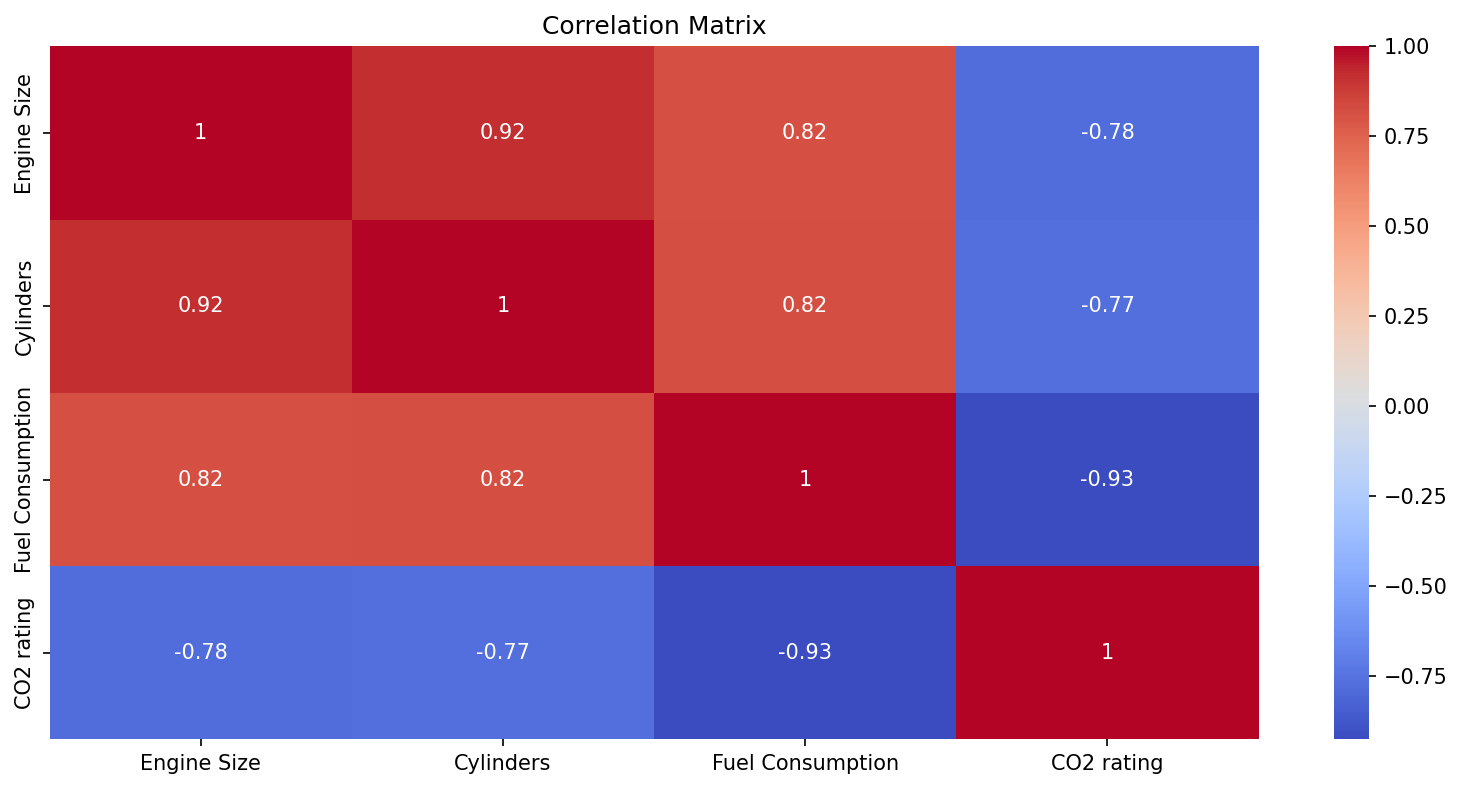

In [45]:
#Heatmap showing "Pearson correlation" 

# Select only numeric columns
df_number = df.select_dtypes(include=['number'])

# Create the heatmap
plt.figure(figsize=(13, 6), dpi=150)
sns.heatmap(df_number.corr(), annot=True,cmap='coolwarm' )
plt.title("Correlation Matrix")
plt.show()


# Performing Chi Square analysis

In [48]:
# from scipy.stats import chi2_contingency
fuel_type= pd.crosstab(df['Transmission'],df['Fuel type'])
fuel_type

Fuel type,D,E,X,Z
Transmission,,,,
A,26,4,155,109
AM,0,0,21,106
AS,3,10,161,208
AV,0,0,78,8
M,0,0,42,39


In [52]:
Chi_square_statistic,p,dof,expec = chi2_contingency(fuel_type)

In [53]:
alpha = 0.05
print("p_value is " + str(p))
if p <= alpha:
    print('Dependent')
    print('dof is ' +str(dof))
else:
    print('Independent')
    print('dof is ' +str(dof))

p_value is 2.4991683544633868e-34
Dependent
dof is 12


In [55]:
#Transmission and Vehicle Class:
vechicleClass=pd.crosstab(df['Transmission'],df['Vehicle class'])
vechicleClass

Vehicle class,Compact,Full-size,Mid-size,Minicompact,Minivan,Pickup truck: Small,Pickup truck: Standard,Special purpose vehicle,Sport utility vehicle: Small,Sport utility vehicle: Standard,Station wagon: Mid-size,Station wagon: Small,Subcompact,Two-seater,Van: Passenger
Transmission,,,,,,,,,,,,,,,
A,11,15,19,3,3,14,81,4,52,72,3,2,14,1,0
AM,9,18,9,18,0,0,0,0,16,0,1,6,16,34,0
AS,34,20,53,2,2,1,33,8,107,66,3,3,34,12,4
AV,14,8,22,0,2,0,0,1,23,5,2,7,2,0,0
M,17,4,13,7,0,2,1,0,6,0,0,2,17,12,0


In [56]:
Chi_square_statistic,p,dof,expec = chi2_contingency(vechicleClass)

In [57]:
alpha = 0.05
print("p_value is " + str(p))
if p <= alpha:
    print('Dependent')
    print('dof is ' +str(dof))
else:
    print('Independent')
    print('dof is ' +str(dof))

p_value is 6.1887556135284346e-80
Dependent
dof is 56


# Data Processing

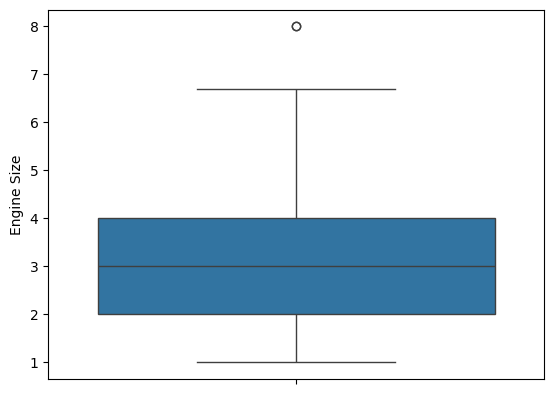

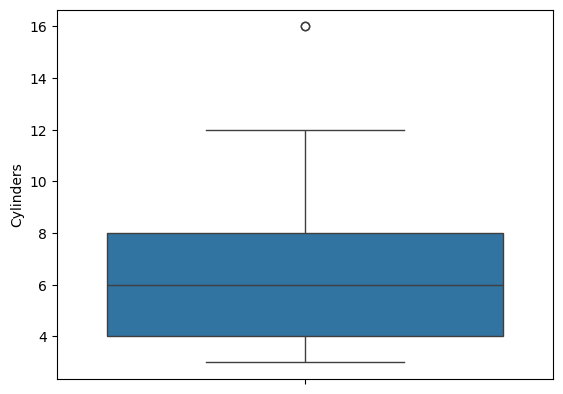

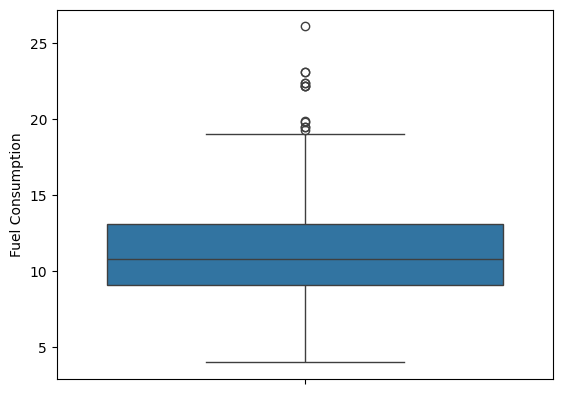

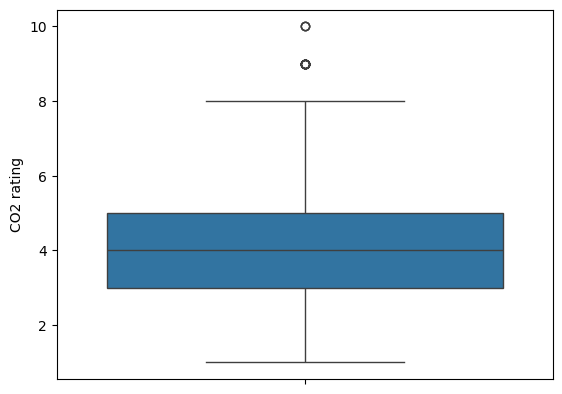

In [58]:
## Outlier analysis in the data
for col in df.columns:
    if df[col].dtypes!= object:
        sns.boxplot(y=col,data=df)
        plt.show()

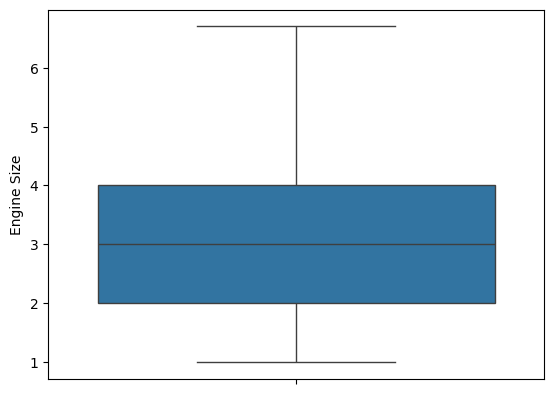

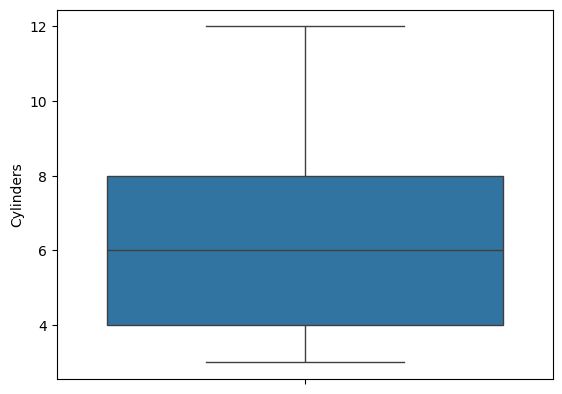

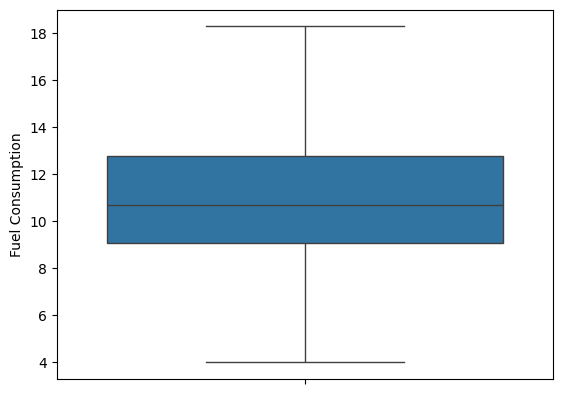

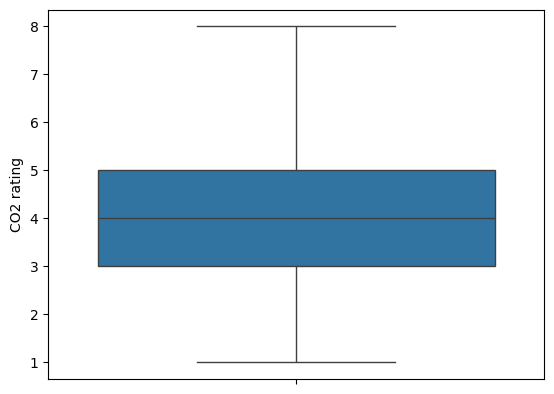

In [59]:
for col in df.columns:
    if df[col].dtypes!= object:
        percentile_25=df[col].quantile(0.25)
        percentile_75=df[col].quantile(0.75)
        IQR=percentile_75-percentile_25
        upper_limit=percentile_75+(1.5*IQR)
        lower_limit=percentile_25-(1.5*IQR)
        df=df[df[col]<=upper_limit]
        df=df[df[col]>=lower_limit]
        plt.figure()
        sns.boxplot(y=col,data=df)

# Ordinal encoding

In [62]:
order = ['AV', 'AM', 'M', 'AS', 'A']

od = OrdinalEncoder(categories = [order])

df["Transmission_X"] = od.fit_transform(df[["Transmission"]])

In [70]:

# Correct the order list
order = [
    'Compact', 'Full-size', 'Mid-size', 'Minicompact', 'Minivan', 
    'Pickup truck: Small', 'Pickup truck: Standard', 
    'Special purpose vehicle', 'Sport utility vehicle: Small', 
    'Sport utility vehicle: Standard', 'Station wagon: Mid-size', 
    'Station wagon: Small', 'Subcompact', 'Two-seater', 'Van: Passenger'
]


od = OrdinalEncoder(categories = [order])

df["Vehicle class_X"] = od.fit_transform(df[["Vehicle class"]])
df.head()

,Vehicle class,Engine Size,Cylinders,Transmission,Fuel type,Fuel Consumption,CO2 rating,Transmission_X,Vehicle class_X
0,Compact,2.4,4,AM,Z,8.6,6,1.0,0.0
1,Two-seater,3.5,6,AM,Z,11.0,4,1.0,13.0
2,Sport utility vehicle: Small,2.0,4,AS,Z,9.9,5,3.0,8.0
3,Sport utility vehicle: Small,2.0,4,AS,Z,10.3,5,3.0,8.0
4,Compact,2.0,4,AS,Z,9.8,5,3.0,0.0


# One Hot encoding on categorical columns

In [71]:
new_df = df['Fuel type'].str.get_dummies()
new_df

,D,E,X,Z
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
965,0,0,0,1
966,0,0,0,1
967,0,0,0,1
968,0,0,0,1


In [72]:
df= pd.concat([df,new_df], axis =1)
df.head()

,Vehicle class,Engine Size,Cylinders,Transmission,Fuel type,Fuel Consumption,CO2 rating,Transmission_X,Vehicle class_X,D,E,X,Z
0,Compact,2.4,4,AM,Z,8.6,6,1.0,0.0,0,0,0,1
1,Two-seater,3.5,6,AM,Z,11.0,4,1.0,13.0,0,0,0,1
2,Sport utility vehicle: Small,2.0,4,AS,Z,9.9,5,3.0,8.0,0,0,0,1
3,Sport utility vehicle: Small,2.0,4,AS,Z,10.3,5,3.0,8.0,0,0,0,1
4,Compact,2.0,4,AS,Z,9.8,5,3.0,0.0,0,0,0,1


# Split Into Train and Test

In [77]:
x = df.drop(["Fuel type",'Fuel Consumption',"Vehicle class","Transmission"], axis = 1)
x.head()

,Engine Size,Cylinders,CO2 rating,Transmission_X,Vehicle class_X,D,E,X,Z
0,2.4,4,6,1.0,0.0,0,0,0,1
1,3.5,6,4,1.0,13.0,0,0,0,1
2,2.0,4,5,3.0,8.0,0,0,0,1
3,2.0,4,5,3.0,8.0,0,0,0,1
4,2.0,4,5,3.0,0.0,0,0,0,1


In [78]:
y= df['Fuel Consumption']
y.head().to_frame()

,Fuel Consumption
0,8.6
1,11.0
2,9.9
3,10.3
4,9.8


In [79]:
#from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size= 0.30 , random_state= 51)
xtrain

,Engine Size,Cylinders,CO2 rating,Transmission_X,Vehicle class_X,D,E,X,Z
132,1.4,4,5,3.0,8.0,0,0,1,0
715,2.0,4,5,4.0,2.0,0,0,0,1
518,5.7,8,3,4.0,9.0,0,0,1,0
758,2.0,4,5,3.0,2.0,0,0,0,1
239,1.4,4,6,3.0,8.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
547,3.3,6,4,3.0,4.0,0,0,1,0
736,4.0,8,4,4.0,0.0,0,0,0,1
763,2.0,4,5,0.0,8.0,0,0,1,0
501,2.0,4,5,4.0,8.0,0,0,1,0


# Feature Scaling

In [80]:
#from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtrain

array([[-1.34334515, -0.91017415,  0.49019574, ..., -0.09615088,
         1.06142516, -0.98034578],
       [-0.89635959, -0.91017415,  0.49019574, ..., -0.09615088,
        -0.94212954,  1.02004825],
       [ 1.86005136,  1.21518795, -0.85604413, ..., -0.09615088,
         1.06142516, -0.98034578],
       ...,
       [-0.89635959, -0.91017415,  0.49019574, ..., -0.09615088,
         1.06142516, -0.98034578],
       [-0.89635959, -0.91017415,  0.49019574, ..., -0.09615088,
         1.06142516, -0.98034578],
       [ 0.59359228,  1.21518795, -0.85604413, ..., -0.09615088,
        -0.94212954,  1.02004825]])

In [81]:
xtest = sc.transform(xtest)
xtest

array([[-0.52387163, -0.91017415,  1.16331567, ..., -0.09615088,
         1.06142516, -0.98034578],
       [ 0.59359228,  1.21518795, -1.52916406, ..., -0.09615088,
        -0.94212954,  1.02004825],
       [ 1.33856821,  1.21518795, -0.85604413, ..., -0.09615088,
         1.06142516, -0.98034578],
       ...,
       [-0.52387163, -0.91017415,  1.16331567, ..., -0.09615088,
         1.06142516, -0.98034578],
       [ 1.86005136,  1.21518795, -0.85604413, ..., -0.09615088,
         1.06142516, -0.98034578],
       [-0.15138366,  0.1525069 ,  0.49019574, ..., -0.09615088,
        -0.94212954,  1.02004825]])

# Training ML Models

# Linear Regression

In [99]:
#from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [100]:
lr.intercept_

11.078759850472004

## checking if model is overfitted or underfitted

In [103]:
print("training score = ",lr.score(xtrain,ytrain))
print("testing score = ",lr.score(xtest,ytest))

training score =  0.9584642563085354
testing score =  0.9585490041248463


In [106]:
ypred = lr.predict(xtest)

In [116]:
r2 = r2_score(ytest, ypred)
print("R2 Score:", r2)

R2 Score: 0.9585490041248463


In [114]:

lr_mae = mean_absolute_error(ytest, ypred)
lr_mse = mean_squared_error(ytest, ypred)
lr_rmse = np.sqrt(lr_mse)

print(f"Linear Regression - MAE: {lr_mae}")
print(f"Linear Regression - MSE: {lr_mse}")
print(f"Linear Regression - RMSE: {lr_rmse}")


Linear Regression - MAE: 0.4260097591307623
Linear Regression - MSE: 0.2544981686582358
Linear Regression - RMSE: 0.5044781151430019


# Decision Tree

In [159]:
# from sklearn.tree import DecisionTreeRegressor
dc=DecisionTreeRegressor(max_depth=4)

In [160]:
dc.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=4)

In [161]:
dc.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=4)

### Checking if model is overfitted or underfitted

In [162]:
print("training score = ",dc.score(xtrain,ytrain))
print("testing score = ",dc.score(xtest,ytest))

training score =  0.9602780603609526
testing score =  0.9517548402043701


In [163]:
r2 = r2_score(ytest, ypred)
print("R2 Score:", r2)

R2 Score: 0.9662037109858315


In [167]:
lr_mae = mean_absolute_error(ytest, ypred)
lr_mse = mean_squared_error(ytest, ypred)
lr_rmse = np.sqrt(lr_mse)

print(f"Decision Tree - MAE: {lr_mae}")
print(f"Decision Tree - MSE: {lr_mse}")
print(f"Decision Tree - RMSE: {lr_rmse}")

Decision Tree - MAE: 0.352022076226345
Decision Tree - MSE: 0.20750028991959546
Decision Tree - RMSE: 0.4555219971852023


#### Visualizing tree

In [164]:
from sklearn import tree
new = df[["Vehicle class","Engine Size","Cylinders","Transmission","Fuel type","CO2 rating"]]

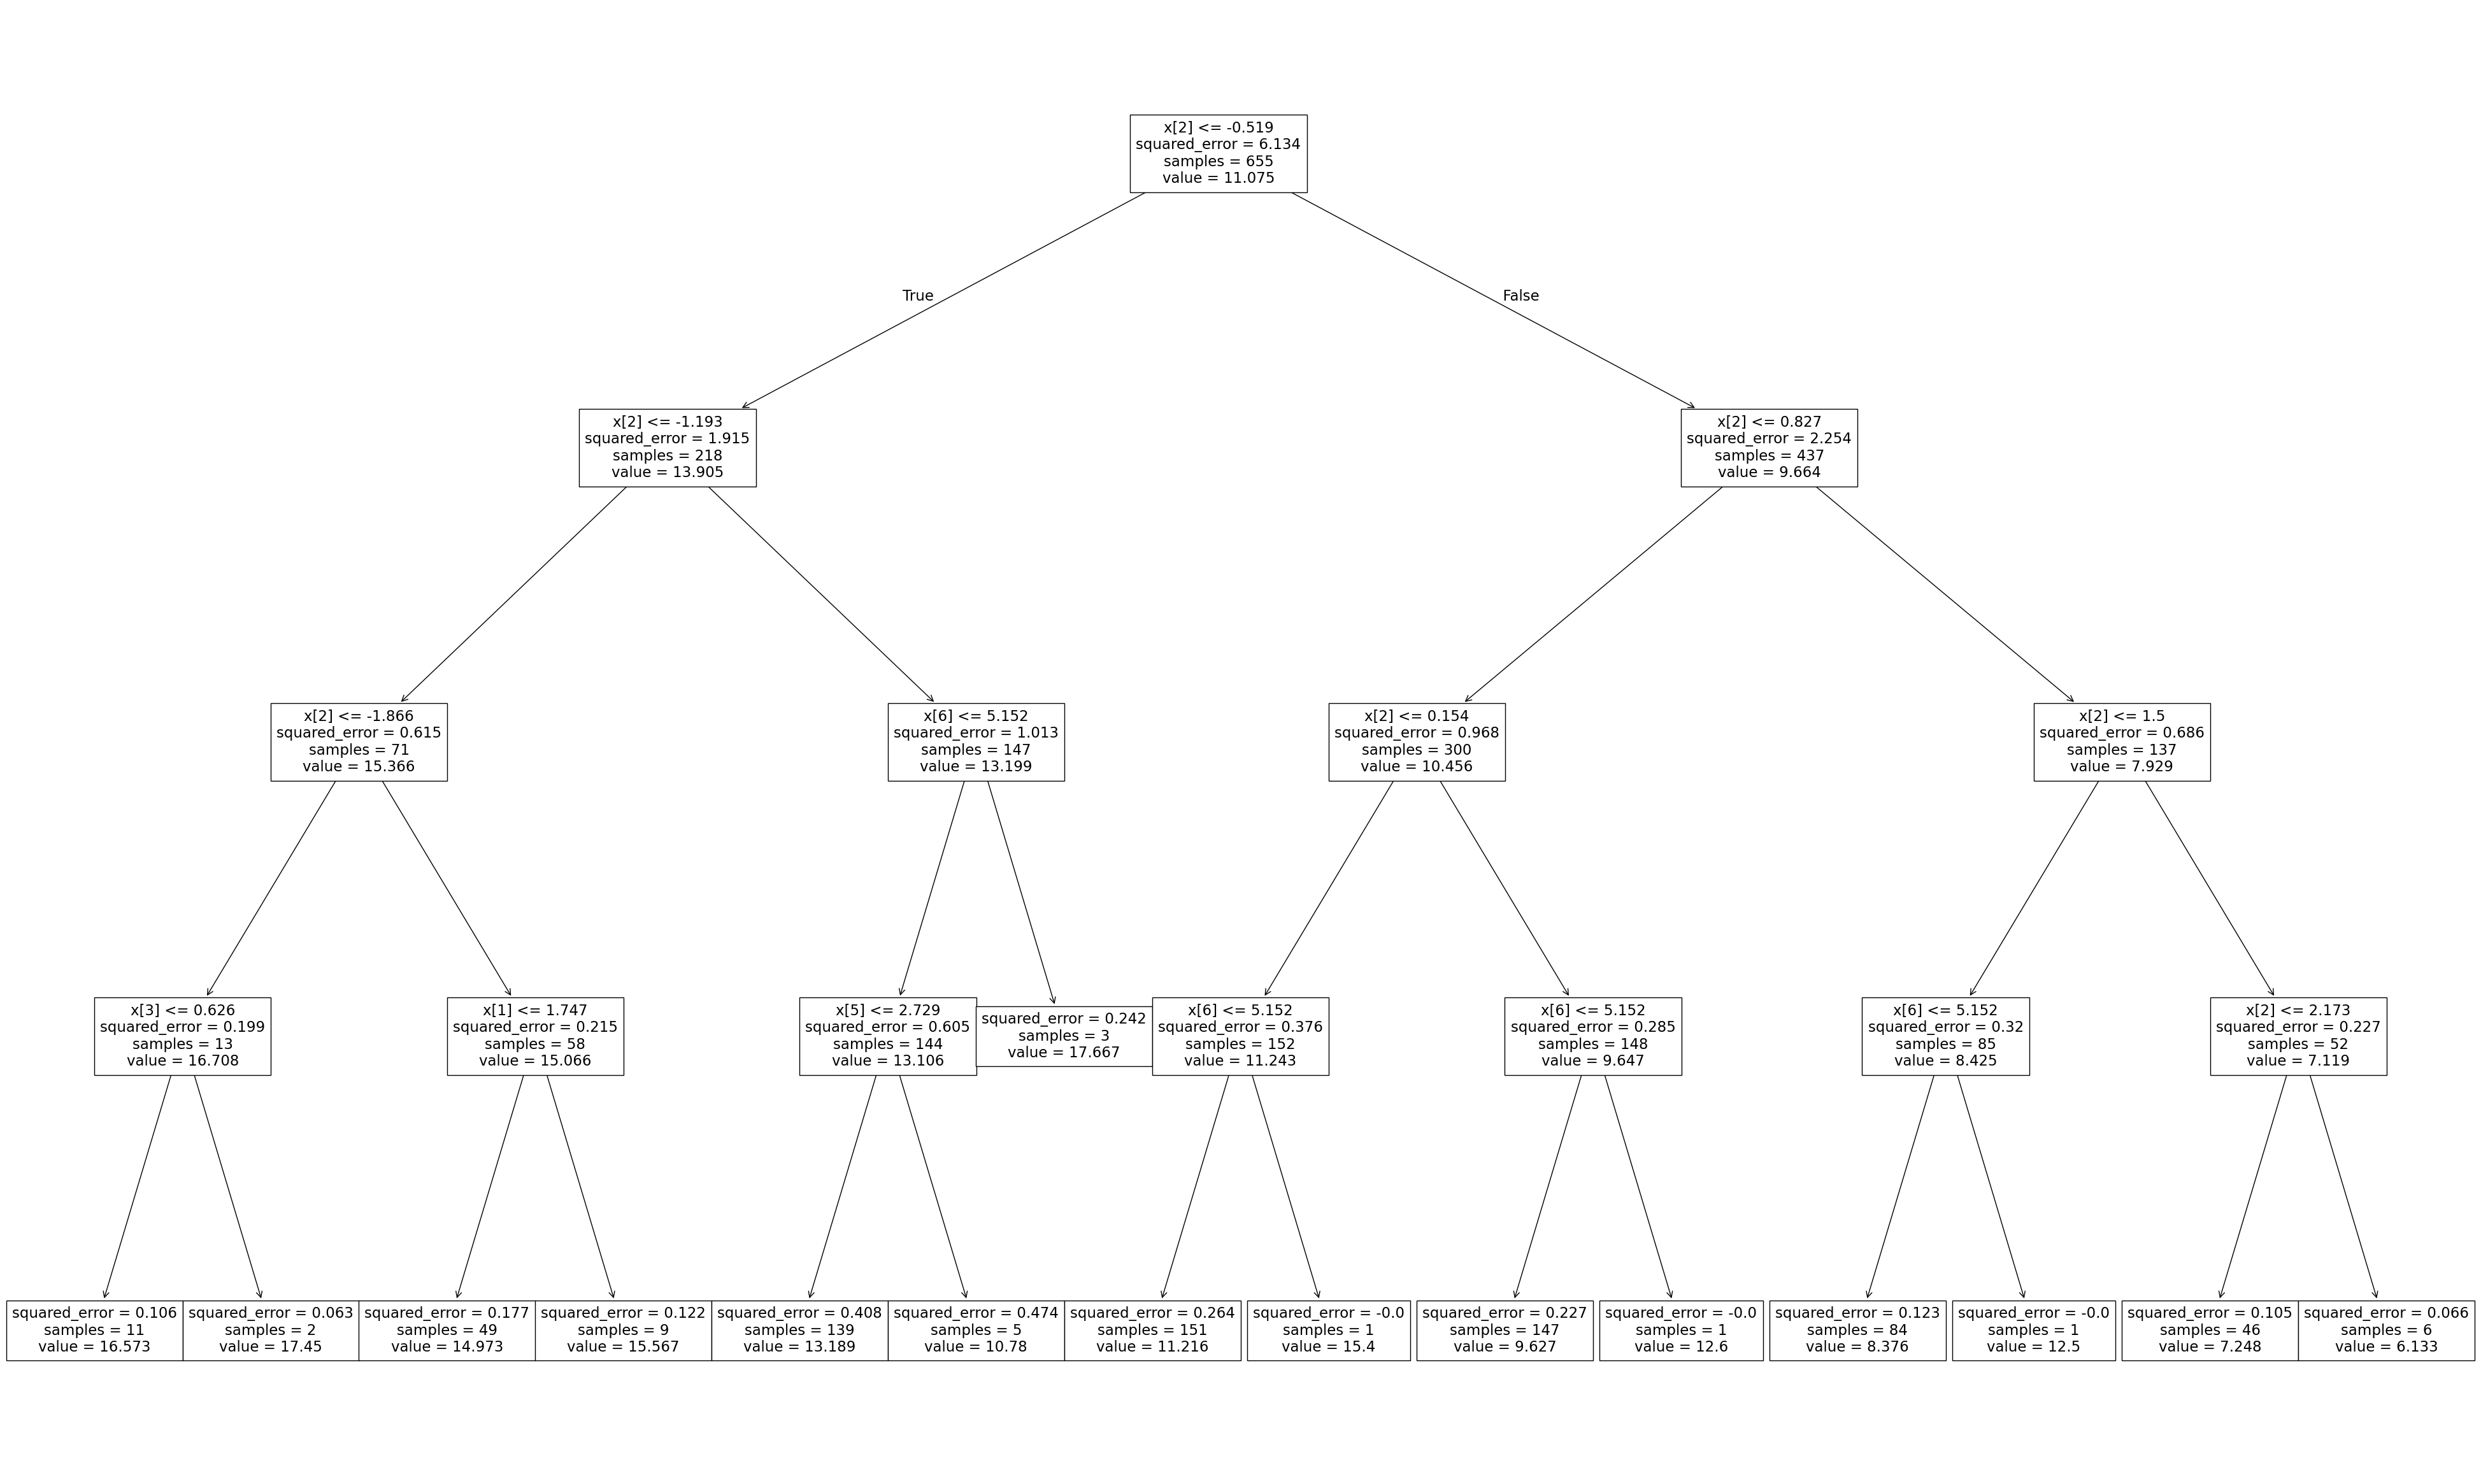

In [207]:
plt.figure(figsize=(50,30))
tree.plot_tree(dc)
plt.show()

# Random Forest

In [157]:
#from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [158]:
no_of_decision_tree = [10,20,30,40,50,60,70,80,90,100]
max_no_of_features = ['sqrt','log2']
max_depth = [6,7,8,9,10,11,12,13,14,15]
criterion_of_decision_tree = ["squared_error", "poisson"]
min_sample_split=[2,3,4,5,6]


In [166]:
random_grid = {
    'n_estimators' : no_of_decision_tree,
    'max_features' : max_no_of_features,
    'max_depth' : max_depth,
    'criterion' : criterion_of_decision_tree,
    'min_samples_split' : min_sample_split
}


## Hyper Parameter Tuning

In [178]:
rf = RandomForestRegressor(random_state=42)

In [182]:
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(estimator = rf , param_distributions = random_grid , n_iter = 25 , cv = 5 ,n_jobs=-1,random_state=42)

In [181]:
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'poisson'],
                                        'max_depth': [6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=42)

In [176]:
rscv.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'max_features': 'log2',
 'max_depth': 14,
 'criterion': 'squared_error'}

In [209]:
rf = RandomForestRegressor(n_estimators = 50 , min_samples_split = 3, max_features =  'sqrt', max_depth = 11, criterion='squared_error')

#rf = rscv.best_estimator_

In [210]:
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

### Checking if model is overfitted or underfitted

In [211]:
print("training score = ",rf.score(xtrain,ytrain))
print("testing score = ",rf.score(xtest,ytest))

training score =  0.9845798221996832
testing score =  0.9610822889796017


In [212]:
r2 = r2_score(ytest, ypred)
print("R2 Score:", r2)

R2 Score: 0.9610822889796017


In [213]:
rf_mae = mean_absolute_error(ytest, ypred)
rf_mse = mean_squared_error(ytest, ypred)
rf_rmse = np.sqrt(rf_mse)

print(f"Random Forest - MAE: {rf_mae}")
print(f"Random Forest - MSE: {rf_mse}")
print(f"Random Forest - RMSE: {rf_rmse}")

Random Forest - MAE: 0.35505828032698805
Random Forest - MSE: 0.23894446861767
Random Forest - RMSE: 0.4888194642377388


In [221]:

results = []

# Linear Regression


# Predictions and metrics
lr_predictions = lr.predict(xtest)
lr_r2 = r2_score(ytest, lr_predictions)
lr_mae = mean_absolute_error(ytest, lr_predictions)
lr_mse = mean_squared_error(ytest, lr_predictions)
lr_rmse = np.sqrt(lr_mse)

# Store Linear Regression results
results.append({
    'Model': 'Linear Regression',
    'Training Score': lr.score(xtrain, ytrain),
    'Testing Score': lr.score(xtest, ytest),
    'R² Score': lr_r2,
    'MAE': lr_mae,
    'MSE': lr_mse,
    'RMSE': lr_rmse
})

# Decision Tree 

# Predictions and metrics
dc_predictions = dc.predict(xtest)
dc_r2 = r2_score(ytest, dc_predictions)
dc_mae = mean_absolute_error(ytest, dc_predictions)
dc_mse = mean_squared_error(ytest, dc_predictions)
dc_rmse = np.sqrt(dc_mse)

# Store Decision Tree results
results.append({
    'Model': 'Decision Tree',
    'Training Score': dc.score(xtrain, ytrain),
    'Testing Score': dc.score(xtest, ytest),
    'R² Score': dc_r2,
    'MAE': dc_mae,
    'MSE': dc_mse,
    'RMSE': dc_rmse
})

# Random Forest 

# Predictions and metrics
rf_predictions = rf.predict(xtest)
rf_r2 = r2_score(ytest, rf_predictions)
rf_mae = mean_absolute_error(ytest, rf_predictions)
rf_mse = mean_squared_error(ytest, rf_predictions)
rf_rmse = np.sqrt(rf_mse)

# Store Random Forest results
results.append({
    'Model': 'Random Forest',
    'Training Score': rf.score(xtrain, ytrain),
    'Testing Score': rf.score(xtest, ytest),
    'R² Score': rf_r2,
    'MAE': rf_mae,
    'MSE': rf_mse,
    'RMSE': rf_rmse
})

results_df = pd.DataFrame(results)

# Display the results
print(results_df)




               Model  Training Score  Testing Score  R² Score       MAE  \
0  Linear Regression        0.958464       0.958549  0.958549  0.426010   
1      Decision Tree        0.960278       0.951755  0.951755  0.433643   
2      Random Forest        0.986163       0.957310  0.957310  0.361885   

        MSE      RMSE  
0  0.254498  0.504478  
1  0.296213  0.544254  
2  0.262105  0.511962  


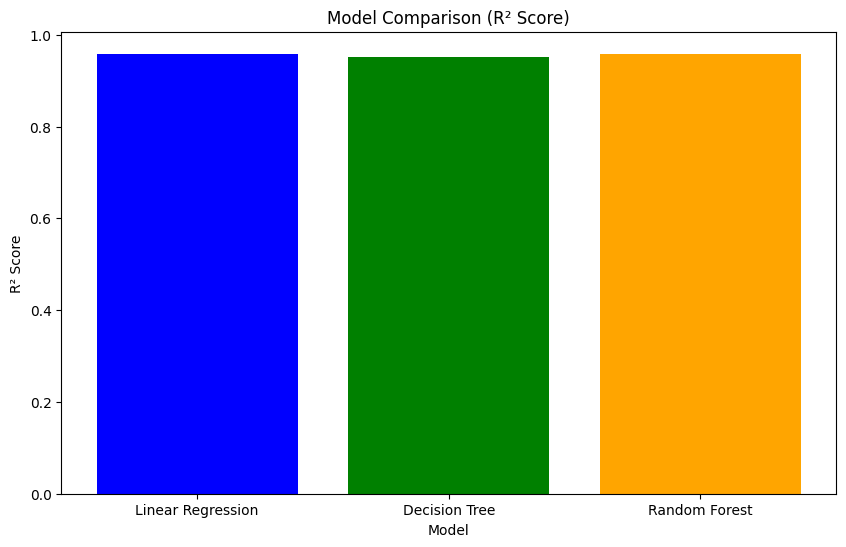

In [217]:
# Plot R² Score comparison
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['R² Score'], color=['blue', 'green', 'orange'])
plt.title('Model Comparison (R² Score)')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.show()


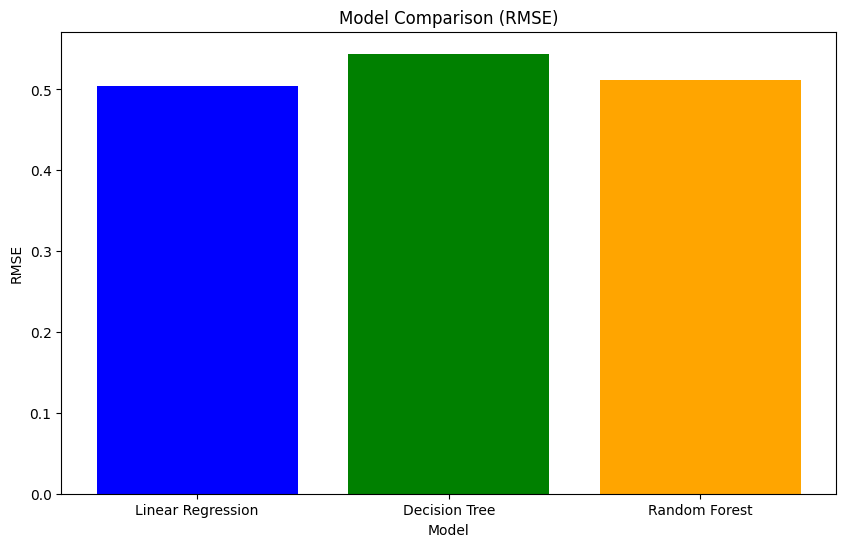

In [216]:
# Plot RMSE comparison
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['RMSE'], color=['blue', 'green', 'orange'])
plt.title('Model Comparison (RMSE)')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.show()